In [24]:
%matplotlib inline

In [25]:
import trend_analysis
import pandas as pd
import pandas as pds
import geopandas as gpd
import geopandas as gpds
from pathlib import Path
import pickle
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [26]:
# Read basemap for Iceland
bmap = gpds.read_file(r'C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\stanford-xz811fy7881-shapefile\island_isn93.shp')
# Source: Hijmans, Robert J.. (2015). Boundary, Iceland, 2015. [Shapefile]. University of California, Berkeley. Museum of Vertebrate Zoology. https://purl.stanford.edu/xz811fy7881

# Define plot specifications
colormap = 'RdBu'

# Turn on Seaborn style
facecolor = 'white' 
plt.rcParams['font.family'] = 'Arial' 
streamflow_markersize = 200
streamflow_sign_size = 22
map_fontsize = 20
map_fontsize_sea = 35
shift_value = 100

# This notebook calculates annual and seasonal trends in streamflow, and then performs a
# sub-seasonal trend analysis for streamflow and meteorological variables

In [30]:
# Define variables, create folders, etc.
missing_data_threshold = 0.8
start_year = 1973
end_year = 2023

# Define the base path for the lamah-ice dataset
lamah_ice_base_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice")

# Read the gauges shapefile that contains the indices and V numbers
gauges_shapefile = lamah_ice_base_path / "D_gauges/3_shapefiles/gauges.shp"
gauges_gdf = gpd.read_file(gauges_shapefile)
gauges_gdf = gauges_gdf.set_index('id')
gauges_gdf = gauges_gdf.set_crs('epsg:3057')

# Read the catchment characteristics - Extract glac_fra
catchment_attributes_file = lamah_ice_base_path / "A_basins_total_upstrm/1_attributes/Catchment_attributes.csv"
catchments_chara = pds.read_csv(catchment_attributes_file, sep=';')
catchments_chara = catchments_chara.set_index('id')
gauges_gdf['g_frac'] = catchments_chara['g_frac']

# Read catchments
catchments_shapefile = lamah_ice_base_path / "A_basins_total_upstrm/3_shapefiles/Basins_A.shp"
catchments = gpd.read_file(catchments_shapefile)
catchments = catchments.set_index('id')
catchments = catchments.set_crs('epsg:3057')

# Create folders
base_folder = Path(r'C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\figures_dec_testing')
daily_timeseries_path, annual_autocorrelation_path, maps_path, raster_trends_path,seasonal_trends_path_mod_ts, annual_trends_path_mod_ts,monthly_trends_path_mod_ts = trend_analysis.create_folders(base_folder,start_year,end_year)
save_path = Path(r"C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\data\unfiltered_meas_m3_s_without_highly_influenced_gauges_nov25_2024.csv")

df_with_data = pds.read_csv(save_path)
df_with_data = df_with_data.set_index('Unnamed: 0')
df_with_data.index = pds.to_datetime(df_with_data.index)
df_with_data = df_with_data[:'2023-09-30']

In [28]:
# Define the columns to drop, including optional ones
columns_to_drop = ['33', '43', '9', '13', '78']  # Hrafnkelsdalsá, Hálslón Reservoir, Syðri-Bægisá, Elliðaár, Smyrlabjargaá

# Drop the columns with errors ignored if they don't exist
df_with_data = df_with_data.drop(columns=columns_to_drop, errors='ignore')

In [29]:
# Calculate trends in the streamflow timeseries
df = trend_analysis.return_df_updated(df_with_data,start_year,end_year,missing_data_threshold)

# Here we calculate seasonal trends but eliminate a year for a given season if the ratio of valid measurement days
# is less than a given treshold
results, valid_data_dict, invalid_data_dict, plot_dict,plot_dict_mod = trend_analysis.calc_trends(df,gauges_gdf, missing_data_threshold=missing_data_threshold)
results.index = results.index.astype('int')
results = results.astype('float').round(3)
merged_gdf = gauges_gdf.merge(results, left_index=True, right_index=True)
merged_gdf["index"] = merged_gdf.index

pickle.dump( valid_data_dict, open( "valid_data_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( invalid_data_dict, open( "invalid_data_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( plot_dict, open( "plot_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( plot_dict_mod, open( "plot_dict_mod_%s_%s.p" % (start_year,end_year), "wb" ) )
results.to_csv('results_%s_%s.csv' %(start_year,end_year),sep=';')
merged_gdf.to_file('merged_gdf_%s_%s.gpkg' %(start_year,end_year),driver="GPKG")

Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 101 (Þjórsá, Dynkur, 1988-1996)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 99 (Þjórsá, Norðlingaalda, 1970-1980)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 990 (Þjórsá, Norðlingaalda, 1985-1996)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 103 (Þjórsá, Tröllkonuhlaup)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 96 (Álftafitjakvísl, Álftafitjakvísl)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 61 (Kálfá, Kálfá)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 50 (Kaldakvísl, Klifshagavellir)
Gauge omitted: Overall raw coverage between 1973 and 2023 is less than 0.8 for gauge id 20 (Fossá, Hjálp)
Gauge omitted: Overall raw coverage between 1973 an

C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:99: RuntimeWarning: invalid value encountered in sqrt
  z = (s - 1)/np.sqrt(var_s)


Gauge omission: For gauge id 45, valid data percent is 0.56 for season DJF (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.66 for season MAM (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.56 for month 1 (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.58 for month 2 (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.62 for month 3 (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.66 for month 4 (Jökulsá á Fjöllum, Grímsstaðir)
Gauge omission: For gauge id 45, valid data percent is 0.66 for month 12 (Jökulsá á Fjöllum, Grímsstaðir)


C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:103: RuntimeWarning: invalid value encountered in sqrt
  z = (s + 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:103: RuntimeWarning: invalid value encountered in sqrt
  z = (s + 1)/np.sqrt(var_s)


Gauge omission: For gauge id 105, valid data percent is 0.72 for season DJF (Þverá, Nauteyri)
Gauge omission: For gauge id 105, valid data percent is 0.76 for month 1 (Þverá, Nauteyri)
Gauge omission: For gauge id 105, valid data percent is 0.76 for month 2 (Þverá, Nauteyri)
Gauge omission: For gauge id 105, valid data percent is 0.74 for month 12 (Þverá, Nauteyri)
Gauge omission: For gauge id 91, valid data percent is 0.76 for season DJF (Vatnsdalsá, Forsæludalur)
Gauge omission: For gauge id 91, valid data percent is 0.7647058823529411 for season SON (Vatnsdalsá, Forsæludalur)


In [31]:
which_plots = {'annual_map': True,
              'seasonal_map': True,
              'annual_series': False,
              'seasonal_series': False,
              'monthly_series': False,
               'low_flow_map': True,
               'high_flow_map': True,
              'low_flow_series': False,
              'high_flow_series': False,
              'glaciated_basins': True}

In [32]:
# Plot the plots
import importlib
importlib.reload(trend_analysis)
trend_analysis.plot_trendfigs(catchments, which_plots, merged_gdf, start_year, end_year, results,valid_data_dict,invalid_data_dict,plot_dict,plot_dict_mod, daily_timeseries_path, annual_autocorrelation_path, maps_path,raster_trends_path,seasonal_trends_path_mod_ts, annual_trends_path_mod_ts,monthly_trends_path_mod_ts)

C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\Notebooks\June2024\trend_analysis.py:710: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\Notebooks\June2024\trend_analysis.py:843: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


# Streamflow - Sub-seasonal trends

In [45]:
# Read the catchment characteristics - Extract area_calc and human influence
catchments_chara = pds.read_csv(Path(r'C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\1_attributes\Catchment_attributes.csv'),sep=';')
catchments_chara = catchments_chara.set_index('id')

mask = catchments_chara[catchments_chara['degimpact'] != 's'].index
filtered_mask = mask[mask.isin([int(i) for i in df_with_data.columns])].values

window_length = 21
raster_trends_path = Path(r"C:/Users/hordurbhe/OneDrive - Landsvirkjun/Changes in streamflow in Iceland/figures_june/1973_2023/raster_trends/21DMA")
sortby='glac_fra'
variable = 'streamflow'
start = '1973-10-01'
startyear = int(start[:4])
end = '2023-09-30'
endyear = int(end[:4])
p_values_df, p_copy, trend_df_percent,start_x,end_x,insignificant_indices,trend_df_percent_glac_sort,series_dict,df_ma = trend_analysis.plot_raster_trends_with_significance(df_with_data[[str(i) for i in filtered_mask]],startyear, endyear, missing_data_threshold, raster_trends_path, sortby,variable,window_length)

min year count 40.0 


# Met variables

In [80]:
import glob
import os
# Read met variables
# This script combines ERA5-L data for all catchments and exports it as a .csv
filenames = glob.glob(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\2_timeseries\daily\meteorological_data" + '/*.csv')

start = '1973-01-01'
end = '2023-12-31'
start_year = start[:4]
end_year = end[:4]

base_folder = Path(r'C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\figures\june_2024')

# List of weather variables
#variables = ['prec', '2m_temp_mean', 'total_et', 'swe', 'surf_net_therm_rad_mean', 'surf_net_solar_rad_mean','prec_carra','prec_rav','total_et_rav','2m_temp_rav','surf_dwn_therm_rad_rav','surf_outg_therm_rad_rav','surf_net_therm_rad_rav']
variables = ['prec', '2m_temp_mean'] #, 'total_et', 'swe', 'surf_net_therm_rad_mean', 'surf_net_solar_rad_mean','prec_carra','prec_rav','total_et_rav','2m_temp_rav','surf_dwn_therm_rad_rav','surf_outg_therm_rad_rav','surf_net_therm_rad_rav']

# Initialize dictionaries to store DataFrames for each variable
data_frames_dict = {var: [] for var in variables}

for filename in filenames:
    base_name = os.path.basename(filename)
    catchment_id = int(base_name.split('_')[1].split('.')[0])

    df = pd.read_csv(filename, sep=';')

    # Create a datetime index
    df['YYYY'] = df['YYYY'].astype(str)  # Convert 'YYYY' to string if it's not already
    df['date'] = df['YYYY'] + '-' + df['MM'].astype(str) + '-' + df['DD'].astype(str)
    df.index = pd.to_datetime(df['date'])

    # Loop through variables and create DataFrames
    for var in variables:
        if var != 'surf_net_therm_rad_rav':
            var_df = pd.DataFrame(df[var])
            var_df.rename(columns={var: catchment_id}, inplace=True)
            if var == 'surf_net_therm_rad_mean':
                var_df*=-1 # Change sign: Now downwards fluxes are positive
            data_frames_dict[var].append(var_df)

# Concatenate DataFrames for each variable
combined_dfs = {var: pd.concat(frames, axis=1).sort_index().round(2) for var, frames in data_frames_dict.items()}

# Read the extended series for precip and temp

In [31]:
import os
import pandas as pd
import re
from pathlib import Path

# Variables of interest mapping
variables_of_interest = {
    "2m_temperature_mean": "2m_temp_mean",
    #"total_evaporation": "total_et",
    #"snowfall": "snowfall",
    "total_precipitation": "prec"
}

# Regular expression pattern to extract the variable name, including suffixes like '_mean', '_max'
pattern = re.compile(r'ERA5L_([^_]+(?:_[^_]+)*)\.csv')

# Path to the data directory
data_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\era5_land\1950-2024\daily")

# List all CSV files in the directory
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Dictionary to store DataFrames
combined_dfs = {shortname: pd.DataFrame() for shortname in variables_of_interest.values()}

# Debug: List files found
print("Files found:", csv_files)

# Process each file and append data to the appropriate DataFrame
for file in csv_files:
    match = pattern.search(file)
    if match:
        variable_longname = match.group(1)
        print(f"Processing file: {file}, Extracted variable: {variable_longname}")
        
        if variable_longname in variables_of_interest:
            variable_shortname = variables_of_interest[variable_longname]
            print(f"Mapped to shortname: {variable_shortname}")
            
            # Read the CSV file
            df_temp = pd.read_csv(data_path / file, parse_dates=['YYYY MM DD'])
            
            # Debug: Check the contents of df_temp
            print(f"Data read from {file} (first rows):\n", df_temp.head())
            
            # Rename and set the index
            df_temp.rename(columns={'YYYY MM DD': 'timestamp'}, inplace=True)
            df_temp.set_index('timestamp', inplace=True)
            
            # Append to the appropriate DataFrame in combined_dfs
            combined_dfs[variable_shortname] = pd.concat([combined_dfs[variable_shortname], df_temp])
        else:
            print(f"Variable '{variable_longname}' not in variables_of_interest. Skipping...")
    else:
        print(f"No match for file: {file}")

Files found: ['ERA5L_2m_temperature_max.csv', 'ERA5L_2m_temperature_mean.csv', 'ERA5L_2m_temperature_min.csv', 'ERA5L_snowfall.csv', 'ERA5L_total_evaporation.csv', 'ERA5L_total_precipitation.csv']
Processing file: ERA5L_2m_temperature_max.csv, Extracted variable: 2m_temperature_max
Variable '2m_temperature_max' not in variables_of_interest. Skipping...
Processing file: ERA5L_2m_temperature_mean.csv, Extracted variable: 2m_temperature_mean
Mapped to shortname: 2m_temp_mean
Data read from ERA5L_2m_temperature_mean.csv (first rows):
   YYYY MM DD    1    2    3    4    5    6    7    8    9  ...  102  103  104  \
0 1949-12-31  2.6 -1.3 -1.1 -2.0  0.6 -0.4 -0.4  2.8 -1.8  ...  0.3  0.0 -2.2   
1 1950-01-01  0.6 -4.5 -4.3 -4.8 -1.5 -2.5 -2.4  0.3 -3.1  ... -2.0 -2.3 -4.8   
2 1950-01-02 -0.4 -7.8 -7.8 -7.9 -2.9 -5.0 -5.2 -0.6 -5.1  ... -4.0 -4.3 -7.3   
3 1950-01-03 -1.4 -8.8 -8.7 -9.2 -5.3 -6.4 -6.5 -1.0 -7.4  ... -5.1 -5.6 -8.1   
4 1950-01-04 -0.5 -6.6 -6.5 -6.7 -4.7 -5.6 -5.5 -0.3 -7.0 

In [79]:
inds = [str(i) for i in trend_df_percent_glac_sort.columns]

window_length = 21
raster_trends_path = Path(r"C:/Users/hordurbhe/OneDrive - Landsvirkjun/Changes in streamflow in Iceland/figures_june/1973_2023/raster_trends/21DMA")
for variable in list(combined_dfs.keys()):
    print(variable)
    if variable=='prec_carra':
        continue
    start = '1973-01-01'
    startyear = int(start[:4])
    if 'rav' in variable:
        end = '2019-08-25'
        endyear = 2019
    else:
        end = '2023-12-31'
        endyear = int(end[:4])

    met_df = combined_dfs[variable][inds][start:end]
    sortby='glac_fra'
    p_values_df, p_copy, trend_df_percent,start_x,end_x,insignificant_indices,trend_df_percent_glac_sort,series_dict,df_ma = trend_analysis.plot_raster_trends_with_significance(met_df,startyear, endyear, missing_data_threshold, raster_trends_path, sortby,variable,window_length)

2m_temp_mean
min year count 40.0 
prec
min year count 40.0 


# Run the analysis for 1993-2023

# Read streamflow

In [25]:
# Drop álftafitjakvísl (influenced by leakeage from Þórisvatn Reservoir)
df_with_data = df_with_data.drop(columns = ['96'])

In [26]:
start_year = 1993
end_year = 2023

# Create folders
daily_timeseries_path, annual_autocorrelation_path, maps_path, raster_trends_path,seasonal_trends_path_mod_ts, annual_trends_path_mod_ts,monthly_trends_path_mod_ts = trend_analysis.create_folders(base_folder,start_year,end_year)

# Calculate trends in the streamflow timeseries
df = trend_analysis.return_df_updated(df_with_data,start_year,end_year,missing_data_threshold)

# Here we calculate seasonal trends but eliminate a year for a given season if the ratio of valid measurement days
# is less than a given treshold
results, valid_data_dict, invalid_data_dict, plot_dict,plot_dict_mod = trend_analysis.calc_trends(df,gauges_gdf, missing_data_threshold=missing_data_threshold)
results.index = results.index.astype('int')
results = results.astype('float').round(3)
merged_gdf = gauges_gdf.merge(results, left_index=True, right_index=True)
merged_gdf["index"] = merged_gdf.index

pickle.dump( valid_data_dict, open( "valid_data_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( invalid_data_dict, open( "invalid_data_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( plot_dict, open( "plot_dict_%s_%s.p" % (start_year,end_year), "wb" ) )
pickle.dump( plot_dict_mod, open( "plot_dict_mod_%s_%s.p" % (start_year,end_year), "wb" ) )
results.to_csv('results_%s_%s.csv' %(start_year,end_year),sep=';')
merged_gdf.to_file('merged_gdf_%s_%s.gpkg' %(start_year,end_year),driver="GPKG")

Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 101 (Þjórsá, Dynkur, 1988-1996)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 99 (Þjórsá, Norðlingaalda, 1970-1980)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 990 (Þjórsá, Norðlingaalda, 1985-1996)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 103 (Þjórsá, Tröllkonuhlaup)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 61 (Kálfá, Kálfá)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 50 (Kaldakvísl, Klifshagavellir)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 20 (Fossá, Hjálp)
Gauge omitted: Overall raw coverage between 1993 and 2023 is less than 0.8 for gauge id 69 (Reykjará, Brúaröræfum)
Gauge omitted: Overall raw coverage between 1993 and 2023 is l

C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:99: RuntimeWarning: invalid value encountered in sqrt
  z = (s - 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:99: RuntimeWarning: invalid value encountered in sqrt
  z = (s - 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:103: RuntimeWarning: invalid value encountered in sqrt
  z = (s + 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:99: RuntimeWarning: invalid value encountered in sqrt
  z = (s - 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\pymannkendall\pymannkendall.py:99: RuntimeWarning: invalid value encountered in sqrt
  z = (s - 1)/np.sqrt(var_s)
C:\Users\hordurbhe\AppData\Local\a

In [27]:
which_plots = {'annual_map': True,
              'seasonal_map': True,
              'annual_series': False,
              'seasonal_series': False,
              'monthly_series': False,
               'low_flow_map': True,
               'high_flow_map': True,
              'low_flow_series': False,
              'high_flow_series': False,
              'glaciated_basins': True}

In [28]:
# Plot the plots
trend_analysis.plot_trendfigs(catchments, which_plots, merged_gdf, start_year, end_year, results,valid_data_dict,invalid_data_dict,plot_dict,plot_dict_mod, daily_timeseries_path, annual_autocorrelation_path, maps_path,raster_trends_path,seasonal_trends_path_mod_ts, annual_trends_path_mod_ts,monthly_trends_path_mod_ts)

C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\Notebooks\June2024\trend_analysis_final.py:1149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\geopandas\geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\Notebooks\June2024\trend_analysis_final.py:1342: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [48]:
# Read the catchment characteristics - Extract area_calc and human influence
catchments_chara = pds.read_csv(Path(r'C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\1_attributes\Catchment_attributes.csv'),sep=';')
catchments_chara = catchments_chara.set_index('id')

mask = catchments_chara[catchments_chara['degimpact'] != 's'].index
filtered_mask = mask[mask.isin([int(i) for i in df_with_data.columns])].values

window_length = 21
raster_trends_path = Path(r"C:/Users/hordurbhe/OneDrive - Landsvirkjun/Changes in streamflow in Iceland/figures_june/1993_2023/raster_trends/21DMA")
sortby='glac_fra'
variable = 'streamflow'
start = '1993-10-01'
startyear = int(start[:4])
end = '2023-09-30'
endyear = int(end[:4]) 
p_values_df, p_copy, trend_df_percent,start_x,end_x,insignificant_indices,trend_df_percent_glac_sort,series_dict,df_ma = trend_analysis.plot_raster_trends_with_significance(df_with_data[[str(i) for i in filtered_mask]],startyear, endyear, missing_data_threshold, raster_trends_path, sortby,variable,window_length)

min year count 24.0 


# Met variables

In [34]:
inds = [str(i) for i in trend_df_percent_glac_sort.columns]
window_length = 21
raster_trends_path = Path(r"C:/Users/hordurbhe/OneDrive - Landsvirkjun/Changes in streamflow in Iceland/figures_june/1993_2023/raster_trends/21DMA")
for variable in list(combined_dfs.keys()):
    print(variable)
    if variable=='prec_carra':
        continue
    start = '1993-01-01'
    startyear = int(start[:4])
    if 'rav' in variable:
        end = '2019-08-25'
        endyear = 2019
    else:
        end = '2023-12-31'
        endyear = int(end[:4])

    met_df = combined_dfs[variable][inds][start:end]
    sortby='glac_fra'
    p_values_df, p_copy, trend_df_percent,start_x,end_x,insignificant_indices,trend_df_percent_glac_sort,series_dict,df_ma = trend_analysis.plot_raster_trends_with_significance(met_df,startyear, endyear, missing_data_threshold, raster_trends_path, sortby,variable,window_length)

2m_temp_mean
min year count 24.0 
prec
min year count 24.0 


# Plot high-low flow trends

In [3]:
merged_gdf_1973 = gpd.read_file('merged_gdf_%s_%s.gpkg' %(1973,2023),driver="GPKG")
merged_gdf_1973.set_index("index",inplace=True)
merged_gdf_1993 = gpd.read_file('merged_gdf_%s_%s.gpkg' %(1993,2023),driver="GPKG")
merged_gdf_1993.set_index("index",inplace=True)

mask = catchments_chara['degimpact'] != 's'

# Calculate global vmin and vmax from both low flow and high flow trends
low_flow_values = merged_gdf['low_flow_trend'].loc[mask].drop([15,48], errors='ignore').dropna()
high_flow_values = merged_gdf['high_flow_trend'].loc[mask].drop([15,48], errors='ignore').dropna()

# Get the global min and max values
global_vmin = min(low_flow_values.min(), high_flow_values.min())
global_vmax = max(low_flow_values.max(), high_flow_values.max())

global_vmax = max(abs(global_vmin), abs(global_vmax))
global_vmin = -global_vmax

In [33]:
figures_path = Path(r'C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\paper\Figures_Final')

C:\Users\hordurbhe\AppData\Local\anaconda3_\envs\lamah_py311\Lib\site-packages\geopandas\geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
C:\Users\hordurbhe\AppData\Local\Temp\ipykernel_7412\2026702227.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 1])


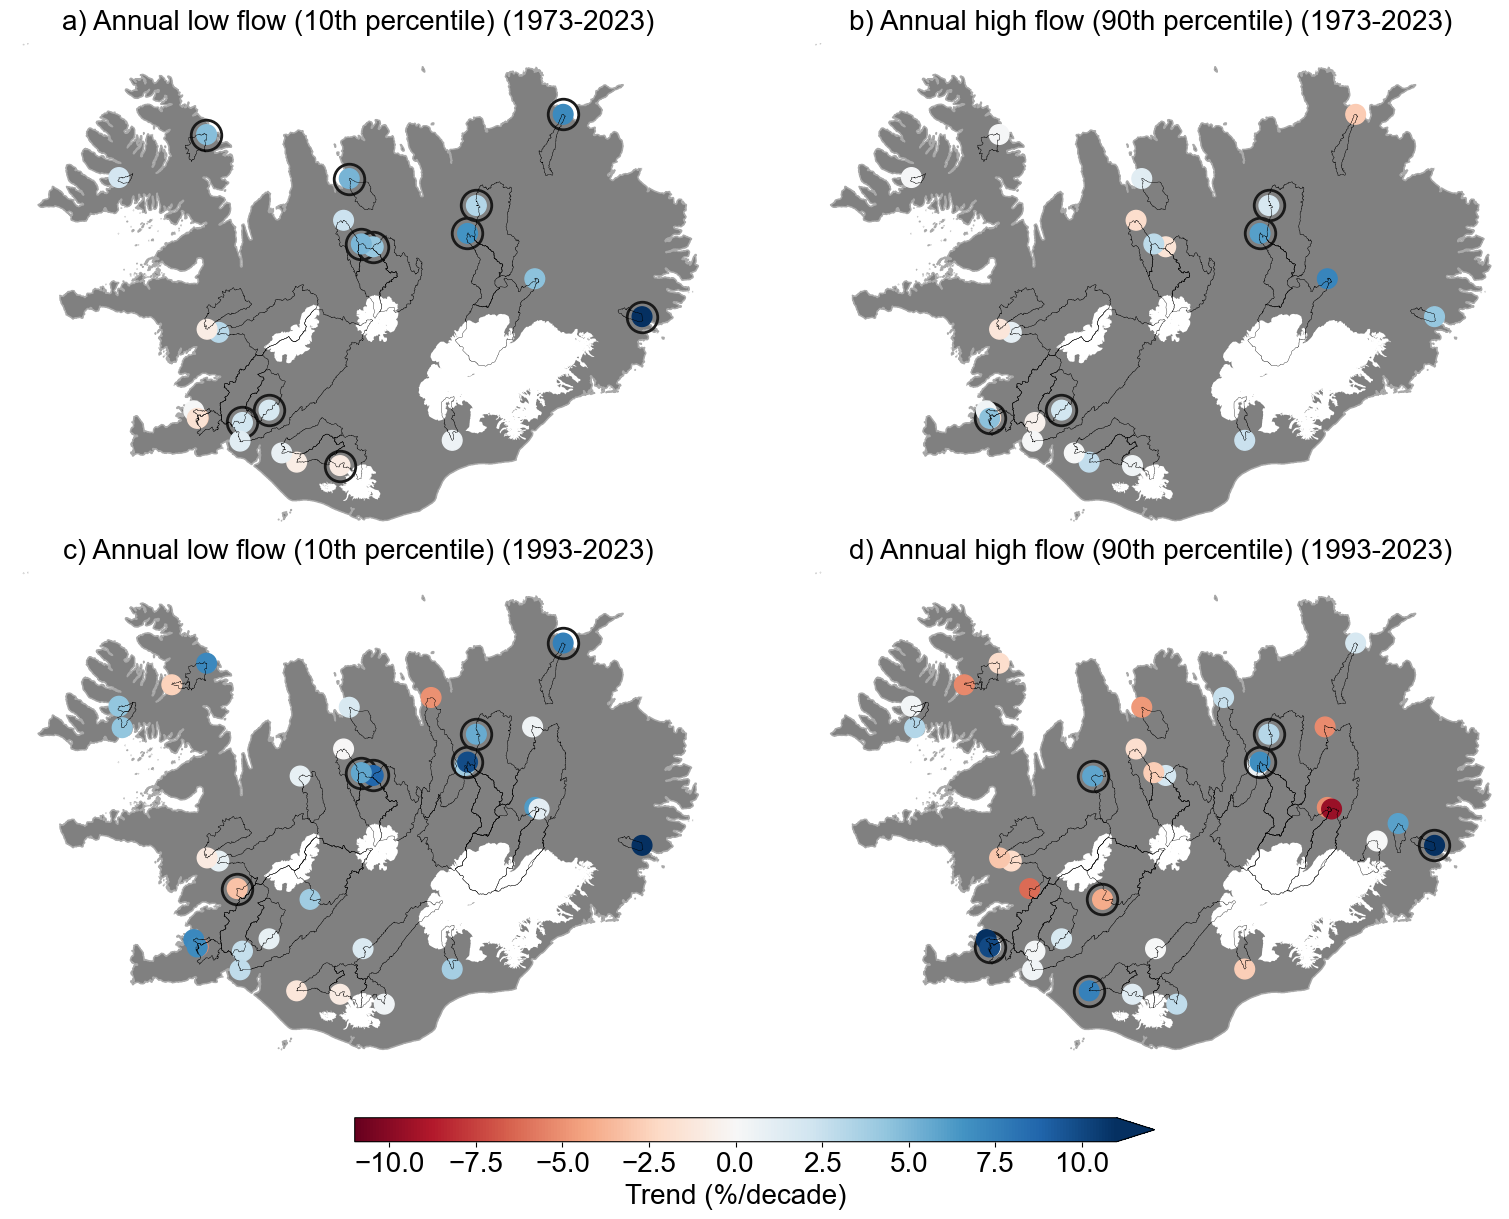

In [36]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import os
plt.rcParams['font.family'] = 'Arial' 
maps_fontsize = 20

# Specify some plot attributes
iceland_shapefile_color = 'gray'
glaciers_color = 'white'
Read glacier outlines
gpath = Path(r'C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\glacier_outline_1890_2019_hh_Aug2021\jökla-útlínur\2019_glacier_outlines.shp')
#Source: Hannesdóttir et al., 2020
glaciers = gpds.read_file(gpath)

# Define the time periods and data
time_periods = [(1973, 2023), (1993, 2023)]
dataframes = [merged_gdf_1973, merged_gdf_1993]

# Calculate global vmin and vmax across all periods and flow types
low_flow_values = []
high_flow_values = []

for gdf in dataframes:
    low_flow_values.extend(gdf['low_flow_trend'].drop([15, 48], errors='ignore').dropna())
    high_flow_values.extend(gdf['high_flow_trend'].drop([15, 48], errors='ignore').dropna())

global_vmin = -11
global_vmax = 11

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')

# Subplot labels
subplot_labels = ['a)', 'b)', 'c)', 'd)']

# Iterate over periods and flow types
for i, (start_year, end_year) in enumerate(time_periods):
    gdf = dataframes[i]
    
    # Low flow plot
    ax = axes[i, 0]
    trend_analysis.plot_figs(bmap, glaciers, ax, iceland_shapefile_color, glaciers_color)
    mask = catchments_chara['degimpact'] != 's'
    im = gdf.loc[mask].drop([15, 48], errors='ignore').plot(
        column='low_flow_trend', legend=False, vmin=global_vmin, vmax=global_vmax,
        ax=ax, cmap=colormap, s=streamflow_markersize, zorder=2
    )
    significant_points = gdf.loc[mask].drop([15, 48], errors='ignore')[gdf.loc[mask]['low_flow_pval'] < 0.05]
    ax.plot(
        significant_points.geometry.x - shift_value, significant_points.geometry.y,
        marker='o', markersize=streamflow_sign_size, markeredgewidth=2, markerfacecolor='none',
        markeredgecolor='k', linestyle='none', lw=0.5, zorder=1
    )
    ax.set_title(f'{subplot_labels[2 * i]} Annual low flow (10th percentile) ({start_year}-{end_year})', fontsize=maps_fontsize)#, loc='left')
    catchments.loc[gdf['low_flow_trend'].loc[mask].drop([15, 48], errors='ignore').dropna().index].plot(facecolor='none', edgecolor='black', ax=ax, zorder=3, lw=0.25)

    # High flow plot
    ax = axes[i, 1]
    trend_analysis.plot_figs(bmap, glaciers, ax, iceland_shapefile_color, glaciers_color)
    mask = catchments_chara['degimpact'] != 's'
    im = gdf.loc[mask].plot(
        column='high_flow_trend', legend=False, vmin=global_vmin, vmax=global_vmax,
        ax=ax, cmap=colormap, s=streamflow_markersize, zorder=2
    )
    significant_points = gdf.loc[mask][gdf.loc[mask]['high_flow_pval'] < 0.05]
    ax.plot(
        significant_points.geometry.x - shift_value, significant_points.geometry.y,
        marker='o', markersize=streamflow_sign_size, markeredgewidth=2, markerfacecolor='none',
        markeredgecolor='k', linestyle='none', lw=0.5, zorder=1
    )
    ax.set_title(f'{subplot_labels[2 * i + 1]} Annual high flow (90th percentile) ({start_year}-{end_year})', fontsize=maps_fontsize)#, loc='left')
    catchments.loc[gdf['high_flow_trend'].loc[mask].dropna().index].plot(facecolor='none', edgecolor='black', ax=ax, zorder=3, lw=0.25)

# Add a shared colorbar below the subplots
cax = fig.add_axes([0.25, 0.05, 0.5, 0.02])
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=global_vmin, vmax=global_vmax))
sm.set_array([])  # Dummy array for the colorbar
cb = ColorbarBase(cax, cmap=colormap, norm=Normalize(vmin=global_vmin, vmax=global_vmax), orientation='horizontal',extend='max')
cb.set_label('Trend (%/decade)', fontsize=maps_fontsize)
cb.ax.tick_params(labelsize=maps_fontsize)

# Set general font size
for ax in axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=maps_fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=maps_fontsize)

# Save and show the figure
plt.tight_layout(rect=[0, 0.1, 1, 1])
save_path = os.path.join(figures_path, 'low_high_flow_trends_2x2.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
save_path = os.path.join(figures_path, 'low_high_flow_trends_2x2.pdf')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

# Check glacier extent

In [9]:
ts_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\2_timeseries\annual\glacier_timeseries")
ids_to_plot_1973 = [37,93,46,98,11,86] # 7, 102
ids_to_plot_1993 = [37,93,46,98,48,11,36,86] # 7, 102

ts_dict = dict()
for idd in ids_to_plot_1993:
    ts = pds.read_csv(os.path.join(ts_path,'ID_%s.csv' % idd),sep=';')
    ts.set_index('Unnamed: 0',inplace=True)
    ts_dict[idd] = ts.loc[1940:]

In [13]:
start_year = 1973
end_year = 2023
results_1973 = pds.read_csv('results_%s_%s.csv' %(start_year,end_year),sep=';')
results_1973.set_index('Unnamed: 0',inplace=True)
JAS_trend_1973 = results_1973['trend_JAS_ts'] #(results_1973['trend_7']+results_1973['trend_8']+results_1973['trend_9'])/3
annual_trend_1973 = results_1973['annual_trend']

start_year = 1993
end_year = 2023
results_1993 = pds.read_csv('results_%s_%s.csv' %(start_year,end_year),sep=';')
results_1993.set_index('Unnamed: 0',inplace=True)
JAS_trend_1993 = results_1993['trend_JAS_ts'] #(results_1993['trend_7']+results_1993['trend_8']+results_1993['trend_9'])/3
annual_trend_1993 = results_1993['annual_trend']

In [14]:
ts_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\2_timeseries\annual\glacier_timeseries")
ids_to_plot_1973 = [37,93,46,98,11,7,102] # 86
ids_to_plot_1993 = [37,93,46,98,48,11,36,7,102] # 86

ts_dict = dict()
for idd in ids_to_plot_1993:
    ts = pds.read_csv(os.path.join(ts_path,'ID_%s.csv' % idd),sep=';')
    ts.set_index('Unnamed: 0',inplace=True)
    ts_dict[idd] = ts.loc[1973:]

In [15]:
all_trend_values = pd.concat([JAS_trend_1973.loc[ids_to_plot_1973], JAS_trend_1993.loc[ids_to_plot_1993]])
print(all_trend_values.min())
print(all_trend_values.max())

-7.892
6.39


In [20]:
sns.reset_orig()

C:\Users\hordurbhe\AppData\Local\Temp\ipykernel_35984\825136363.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')  # Red-to-blue colormap with white at the center
C:\Users\hordurbhe\AppData\Local\Temp\ipykernel_35984\825136363.py:63: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal', pad=0.1, aspect=40)


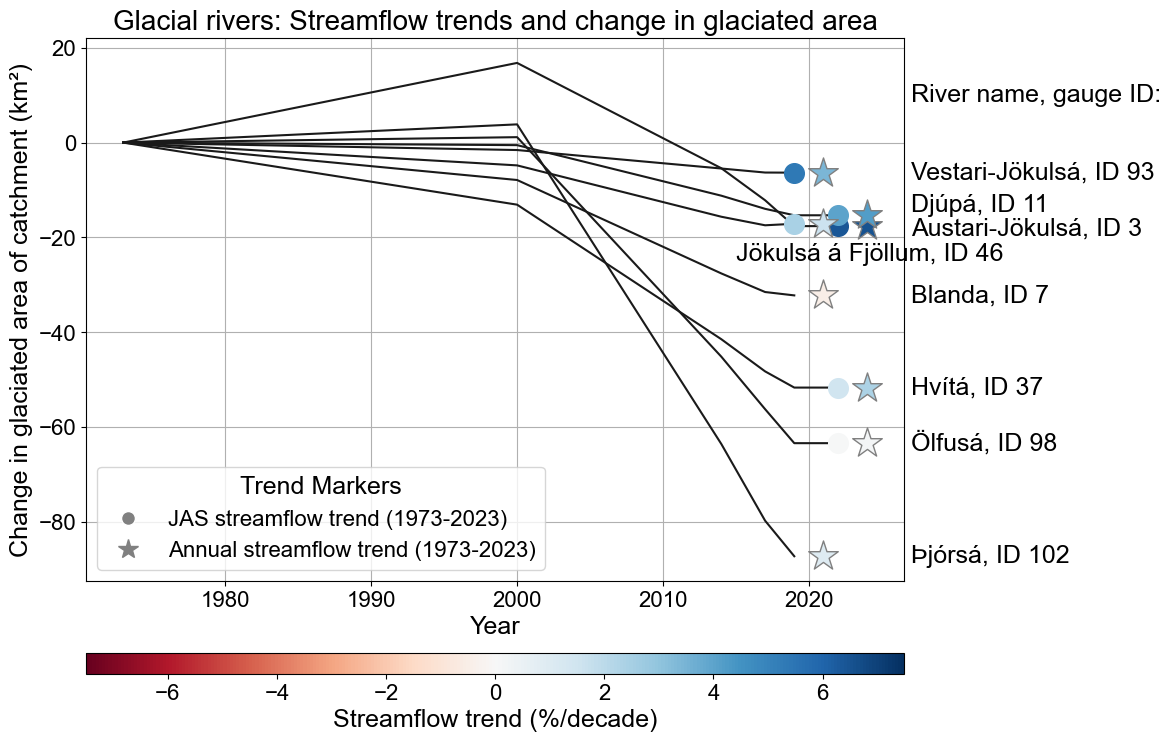

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
from matplotlib import rcParams
from pathlib import Path

# Assuming required data variables like JAS_trend_1973, annual_trend_1973, and gauges_gdf are already defined

# Path to timeseries data
ts_path = Path(r"C:\Users\hordurbhe\Documents\Vinna\lamah\lamah_ice\lamah_ice\A_basins_total_upstrm\2_timeseries\annual\glacier_timeseries")
ids_to_plot_1973 = [3, 37, 93, 46, 98, 11, 7, 102]

# Read timeseries data
ts_dict = {}
for idd in ids_to_plot_1973:
    ts = pd.read_csv(ts_path / f'ID_{idd}.csv', sep=';')
    ts.set_index('Unnamed: 0', inplace=True)
    ts_dict[idd] = ts.loc[1973:]

# Set global font properties
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 16

# Normalize trend values for color mapping, with 0 as the center
all_trend_values = pd.concat([JAS_trend_1973.loc[ids_to_plot_1973], annual_trend_1973.loc[ids_to_plot_1973]])
norm = mcolors.TwoSlopeNorm(vmin=-7.5, vcenter=0, vmax=7.5)
cmap = cm.get_cmap('RdBu')  # Red-to-blue colormap with white at the center

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
for idd in ids_to_plot_1973:
    line = ts_dict[idd]['g_area_dyn'] - ts_dict[idd]['g_area_dyn'][1973]
    line.plot(ax=ax, c='k')

    # Add dot for 1973-2023 JAS streamflow trend
    if idd not in [102, 7]:  # Exclude specific IDs if necessary
        trend_1973 = JAS_trend_1973.loc[idd]
        color_1973 = cmap(norm(trend_1973))
        ax.scatter(line.index[-1], line.iloc[-1], color=color_1973, s=200, zorder=5, label='_nolegend_')

    # Add star for 1973-2023 annual streamflow trend
    annual_trend = annual_trend_1973.loc[idd]
    color_ann = cmap(norm(annual_trend))
    ax.scatter(line.index[-1] + 2, line.iloc[-1], marker='*', color=color_ann, s=500, zorder=6, edgecolor='grey', label='_nolegend_')

    # Adjust gauge ID text positions for specified IDs
    if idd == 46:  # Adjust Þjórsá (ID 46)
        ax.text(2015, line.iloc[-1] - 6, f"{gauges_gdf.loc[idd]['river']}, ID {idd}", fontsize=18, verticalalignment='center')
    elif idd == 11:  # Adjust Djúpá (ID 11)
        ax.text(2027, line.iloc[-1] + 2, f"{gauges_gdf.loc[idd]['river']}, ID {idd}", fontsize=18, verticalalignment='center')
    elif idd == 3:  # Adjust specific river (ID 3)
        ax.text(2027, line.iloc[-1] - 1, f"{gauges_gdf.loc[idd]['river']}, ID {idd}", fontsize=18, verticalalignment='center')
    else:
        ax.text(2027, line.iloc[-1], f"{gauges_gdf.loc[idd]['river']}, ID {idd}", fontsize=18, verticalalignment='center')

ax.text(2027, 10, "River name, gauge ID:", fontsize=18, verticalalignment='center')

# Add colorbar beneath the plot
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(all_trend_values)
cbar = plt.colorbar(sm, orientation='horizontal', pad=0.1, aspect=40)
cbar.set_label('Streamflow trend (%/decade)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

# Add legend box in the lower left
circle_patch = plt.Line2D([0], [0], marker='o', color='w', label='JAS streamflow trend (1973-2023)',
                          markerfacecolor='grey', markersize=10)
star_patch = plt.Line2D([0], [0], marker='*', color='w', label='Annual streamflow trend (1973-2023)',
                        markerfacecolor='grey', markersize=15, markeredgecolor='grey')
ax.legend(handles=[circle_patch, star_patch], loc='lower left', title="Trend Markers", fontsize=16, title_fontsize=18)

# Add labels, title, and grid
ax.set_ylabel('Change in glaciated area of catchment (km²)', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_title('Glacial rivers: Streamflow trends and change in glaciated area', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.grid()

plt.tight_layout()

# Save figures
figures_path = Path(r'C:\Users\hordurbhe\OneDrive - Landsvirkjun\Changes in streamflow in Iceland\paper\Figures_Final')
png_path = figures_path / 'streamflow_trends_vs_change_in_glac_area.png'
pdf_path = figures_path / 'streamflow_trends_vs_change_in_glac_area.pdf'
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')

plt.show()
